# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:

1) There appears to be a very strong relationship between the latitude of a city, and it's maximum temperature, with it being  skewed towards the northern hemisphere. This is makes sense because it is summer time in the northern hemisphere.

2) Humidity shows a bit of a trend in relation to distance from the equator. Near the equator, there is a gap in the plot showing all cities with a fairly high humidity rate. Humidity can be affected by a number of factors, explaining the weaker trend seen here.

3) Cloudiness looks to have almost no trend in the results. Cloudiness is caused by a number of factors we did not explore in our analysis and would require more research to come to a conclusion.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# create data frame to store city list and columns to write weather data to

city_weather = pd.DataFrame({"City":cities,"Cloudiness":"","Country":"","Date":"","Humidity":"","Lat":"",
                         "Lng":"","Max Temp":"","Wind Speed":""})

# building url to be used in loop with city at the end

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

base_url = url + "APPID=" + api_key + "&units=" + units + "&q="

# loop through the data frame, using the city from the row in the url to pull back weather data to that row

print("Beginning Data Retrieval")
print("-------------------------------")

for index, row in city_weather.iterrows():
    
    city = row['City']
    
    query_url = base_url + city
    
    print(f'Processing data for city number {index} | {city}.')
    response = requests.get(query_url).json()
    
    try:
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Wind Speed'] = response['wind']['speed']
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing data for city number 0 | taltal.
Processing data for city number 1 | mandurah.
Processing data for city number 2 | rikitea.
Processing data for city number 3 | mount gambier.
Processing data for city number 4 | elko.
Processing data for city number 5 | ransang.
City not found. Skipping...
Processing data for city number 6 | hermanus.
Processing data for city number 7 | kavieng.
Processing data for city number 8 | sao filipe.
Processing data for city number 9 | shingu.
Processing data for city number 10 | mataura.
Processing data for city number 11 | vaitupu.
City not found. Skipping...
Processing data for city number 12 | punta arenas.
Processing data for city number 13 | kurilsk.
Processing data for city number 14 | marion.
Processing data for city number 15 | tazovskiy.
Processing data for city number 16 | ushuaia.
Processing data for city number 17 | urubicha.
Processing data for city number 18 | jamestown.
Processi

City not found. Skipping...
Processing data for city number 160 | umzimvubu.
City not found. Skipping...
Processing data for city number 161 | port alfred.
Processing data for city number 162 | amderma.
City not found. Skipping...
Processing data for city number 163 | paka.
Processing data for city number 164 | egvekinot.
Processing data for city number 165 | vila franca do campo.
Processing data for city number 166 | lundazi.
Processing data for city number 167 | atuona.
Processing data for city number 168 | gunjur.
Processing data for city number 169 | dujuma.
City not found. Skipping...
Processing data for city number 170 | marcona.
City not found. Skipping...
Processing data for city number 171 | poitiers.
Processing data for city number 172 | geraldton.
Processing data for city number 173 | san vicente.
Processing data for city number 174 | saint-philippe.
Processing data for city number 175 | takoradi.
Processing data for city number 176 | acapulco.
Processing data for city numbe

Processing data for city number 317 | skibbereen.
Processing data for city number 318 | sumbe.
Processing data for city number 319 | daru.
Processing data for city number 320 | roma.
Processing data for city number 321 | taquaritinga.
Processing data for city number 322 | monrovia.
Processing data for city number 323 | batagay-alyta.
Processing data for city number 324 | kadyy.
Processing data for city number 325 | padre bernardo.
City not found. Skipping...
Processing data for city number 326 | zaragoza.
Processing data for city number 327 | aporawan.
City not found. Skipping...
Processing data for city number 328 | port augusta.
Processing data for city number 329 | lata.
Processing data for city number 330 | coahuayana.
Processing data for city number 331 | santa cruz cabralia.
Processing data for city number 332 | umm durman.
City not found. Skipping...
Processing data for city number 333 | hereford.
Processing data for city number 334 | adrar.
Processing data for city number 335 |

City not found. Skipping...
Processing data for city number 477 | hengshui.
Processing data for city number 478 | honningsvag.
Processing data for city number 479 | beausejour.
Processing data for city number 480 | leh.
Processing data for city number 481 | banikoara.
Processing data for city number 482 | payo.
Processing data for city number 483 | luwuk.
Processing data for city number 484 | grand gaube.
Processing data for city number 485 | gat.
Processing data for city number 486 | djibo.
Processing data for city number 487 | nanchong.
Processing data for city number 488 | chon buri.
Processing data for city number 489 | natal.
Processing data for city number 490 | moiyabana.
City not found. Skipping...
Processing data for city number 491 | sorland.
Processing data for city number 492 | pilar.
Processing data for city number 493 | kostenec.
City not found. Skipping...
Processing data for city number 494 | cockburn town.
Processing data for city number 495 | gerede.
Processing data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# filling empty row with an NA to drop NA's, reset the index, and save to a csv file

city_weather['Country'].replace('', np.nan, inplace=True)

city_weather = city_weather.dropna(how='any').reset_index(drop=True)

city_weather.to_csv("City Weather.csv", index=False)

city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taltal,58,CL,1562276260,76,-25.41,-70.49,56.08,3.18
1,mandurah,75,AU,1562276165,93,-32.55,115.7,50,14.99
2,rikitea,99,PF,1562276260,67,-23.12,-134.97,66.81,23.11
3,mount gambier,0,AU,1562276261,93,-37.83,140.78,42.8,8.05
4,elko,40,US,1562276157,21,40.83,-115.76,78.8,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

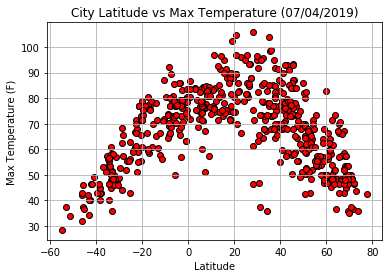

In [16]:
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs Max Temperature (07/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

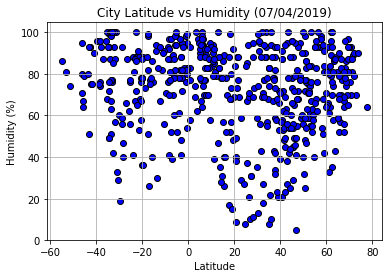

In [17]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs Humidity (07/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

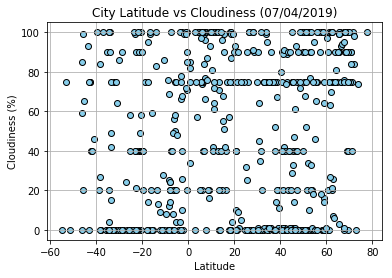

In [18]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], marker="o", facecolors="SkyBlue", edgecolors="black")

plt.title("City Latitude vs Cloudiness (07/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

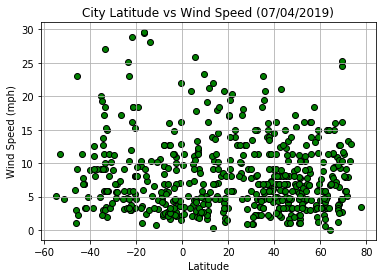

In [19]:
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], marker="o", facecolors="green", edgecolors="black")

plt.title("City Latitude vs Wind Speed (07/04/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("City Latitude vs Wind Speed.png")
plt.show()